In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 7.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import skew
from scipy.stats import kurtosis

In [ ]:
df=pd.read_csv("/content/ADF TEST.csv")
print(df.sample(10))

           Date  BSE 500 PRICE  NIFTY 50 PRICE
151  01-08-2011        6487.22         5001.00
217  01-02-2006        4130.07         3074.70
40   01-11-2020       16995.01        12968.95
21   01-06-2022       21324.54        15780.25
87   01-12-2016       11036.44         8185.80
122  01-01-2014        7499.02         6089.50
41   01-10-2020       15215.01        11642.40
126  01-09-2013        7019.96         5735.30
98   01-01-2016       10014.03         7563.55
235  01-08-2004        2125.65         1631.75


In [ ]:
bse_price=df['BSE 500 PRICE']
print(bse_price.describe())
print(skew(bse_price))
print(kurtosis(bse_price))
result = adfuller(bse_price.values)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')
if result[0]<result[4]["5%"]:
  print("Time series is stationary")
else:
  print("Time series is non stationary")

count      253.000000
mean     10652.813004
std       7171.535438
min       1068.030000
25%       5646.900000
50%       7828.340000
75%      14493.580000
max      32260.970000
Name: BSE 500 PRICE, dtype: float64
0.9883034097659723
0.25353895765088375
ADF Statistic: -2.405876048202174
p-value: 0.14008480133036239
Critical Values:
	1%: -3.458128284586202
	5%: -2.873761835239286
	10%: -2.5732834559706235
Time series is non stationary


In [ ]:
df['DIFF BSE VALUE']=df['BSE 500 PRICE'].diff()
diff_value=df['DIFF BSE VALUE']
y=diff_value[~(np.isnan(diff_value))]
ts_values_orig= df['BSE 500 PRICE'].values
ts_values=ts_values_orig[:-1]
x=sm.add_constant(ts_values)
model=sm.OLS(y,x)
ans=model.fit()
ans.tvalues
residuals=ans.resid
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_results = garch_model.fit()
print(garch_results)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2071.108463816944
Iteration:      2,   Func. Count:     12,   Neg. LLF: 2135.4836279449723
Iteration:      3,   Func. Count:     18,   Neg. LLF: 2071.10943455074
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1929.863780007896
Iteration:      5,   Func. Count:     29,   Neg. LLF: 1929.8597026522355
Iteration:      6,   Func. Count:     34,   Neg. LLF: 1929.83714615545
Iteration:      7,   Func. Count:     39,   Neg. LLF: 1929.7956021931354
Iteration:      8,   Func. Count:     44,   Neg. LLF: 1929.666170911748
Iteration:      9,   Func. Count:     49,   Neg. LLF: 1929.3994217179052
Iteration:     10,   Func. Count:     54,   Neg. LLF: 1929.043165576068
Iteration:     11,   Func. Count:     59,   Neg. LLF: 1928.8901199279662
Iteration:     12,   Func. Count:     64,   Neg. LLF: 1928.844019676642
Iteration:     13,   Func. Count:     69,   Neg. LLF: 1928.8378417730648
Iteration:     14,   Func. Count:     74,   Neg. LLF: 1928.8

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.601e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


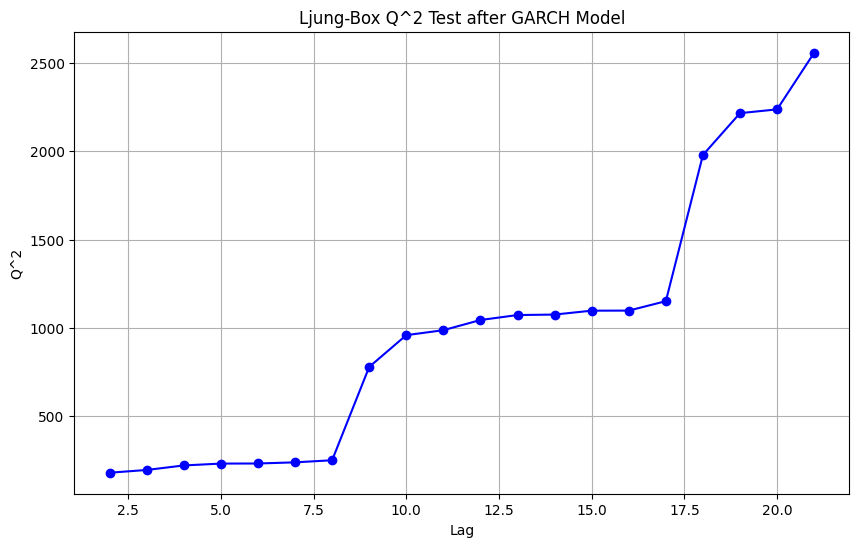

      lb_stat  lb_pvalue
1   13.419257   0.000249
2   13.989636   0.000917
3   14.875652   0.001926
4   15.225722   0.004255
5   15.242448   0.009375
6   15.455933   0.016992
7   15.831169   0.026704
8   27.915017   0.000491
9   30.969695   0.000300
10  31.419712   0.000500
11  32.325006   0.000676
12  32.756244   0.001057
13  32.798455   0.001827
14  33.133328   0.002756
15  33.138912   0.004491
16  33.935151   0.005543
17  44.490450   0.000290
18  47.078334   0.000206
19  47.304897   0.000323
20  50.582633   0.000183


In [ ]:
squared_residuals = garch_results.resid**2
lb_test_results = acorr_ljungbox(squared_residuals, lags=20, return_df=True)
plt.figure(figsize=(10, 6))
plt.plot(lb_test_results.index + 1, lb_test_results['lb_stat']**2, marker='o', linestyle='-', color='b')
plt.xlabel('Lag')
plt.ylabel('Q^2')
plt.title('Ljung-Box Q^2 Test after GARCH Model')
plt.grid(True)
plt.show()
print(lb_test_results)

1      2.383769e+04
2      8.785973e+03
3      1.232915e+05
4      1.586275e+06
5      5.487317e+05
           ...     
248    2.663120e+04
249    2.210969e+03
250    1.523275e+04
251    4.955223e+03
252    1.988522e+03
Name: resid, Length: 252, dtype: float64


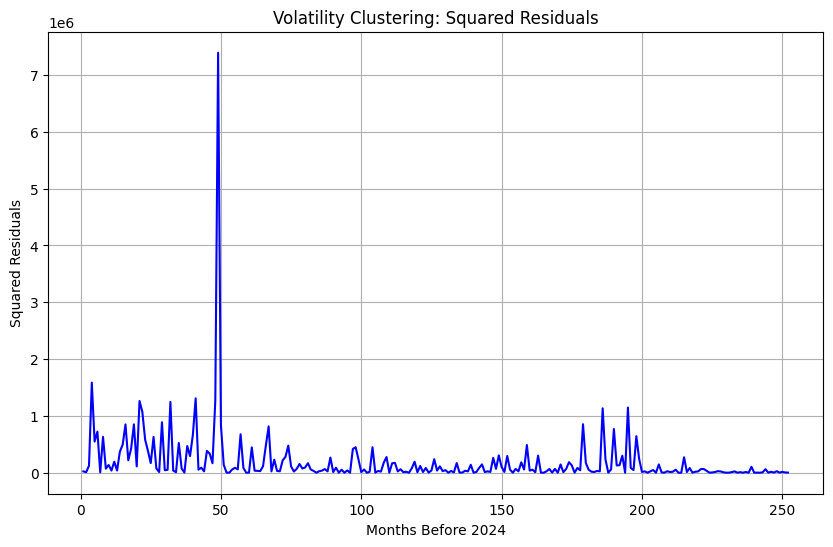

In [ ]:
cosquared_residuals = garch_results.resid ** 2

# Plot squared residuals (volatility clustering)
plt.figure(figsize=(10, 6))
plt.plot(squared_residuals, color='b')
plt.xlabel('Months Before 2024')
plt.ylabel('Squared Residuals')
plt.title('Volatility Clustering: Squared Residuals')
plt.grid(True)
plt.show()

In [ ]:
nifty_price=df['NIFTY 50 PRICE']
print(nifty_price.describe())
print(skew(nifty_price))
print(kurtosis(nifty_price))
result = adfuller(nifty_price)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')
if result[0]<result[4]["5%"]:
  print("Time series is stationary")
else:
  print("Time series is non stationary")

count      253.000000
mean      7994.402569
std       5157.954426
min        934.050000
25%       4360.000000
50%       6134.500000
75%      10830.950000
max      22493.550000
Name: NIFTY 50 PRICE, dtype: float64
0.8896912583228632
-0.015678861974154135
ADF Statistic: -2.9516835672073674
p-value: 0.03965958399559086
Critical Values:
	1%: -3.4565688966099373
	5%: -2.8730786194395455
	10%: -2.5729189953388762
Time series is stationary


In [ ]:
df['DIFF NIFTY VALUE']=df['NIFTY 50 PRICE'].diff()
y=df['DIFF NIFTY VALUE'].dropna()
ts_values_orig= df['BSE 500 PRICE'].values
ts_values=ts_values_orig[:-1]
x=sm.add_constant(ts_values)
model=sm.OLS(y,x)
ans=model.fit()
ans.tvalues
residuals=ans.resid
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_results = garch_model.fit()
print(garch_results)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1989.4272030716988
Iteration:      2,   Func. Count:     12,   Neg. LLF: 2093.6342914024895
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1989.4291970906647
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1850.474695614459
Iteration:      5,   Func. Count:     29,   Neg. LLF: 1850.4678418408591
Iteration:      6,   Func. Count:     34,   Neg. LLF: 1850.4300429308119
Iteration:      7,   Func. Count:     39,   Neg. LLF: 1850.2573680197265
Iteration:      8,   Func. Count:     44,   Neg. LLF: 1849.7426754723087
Iteration:      9,   Func. Count:     49,   Neg. LLF: 1849.6375910227528
Iteration:     10,   Func. Count:     54,   Neg. LLF: 1849.6372048229437
Iteration:     11,   Func. Count:     58,   Neg. LLF: 1849.6372048233109
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1849.6372048229437
            Iterations: 11
            Function evaluations: 58
            Gradient eval

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.915e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


      lb_stat  lb_pvalue
1   13.419257   0.000249
2   13.989636   0.000917
3   14.875652   0.001926
4   15.225722   0.004255
5   15.242448   0.009375
6   15.455933   0.016992
7   15.831169   0.026704
8   27.915017   0.000491
9   30.969695   0.000300
10  31.419712   0.000500
11  32.325006   0.000676
12  32.756244   0.001057
13  32.798455   0.001827
14  33.133328   0.002756
15  33.138912   0.004491
16  33.935151   0.005543
17  44.490450   0.000290
18  47.078334   0.000206
19  47.304897   0.000323
20  50.582633   0.000183


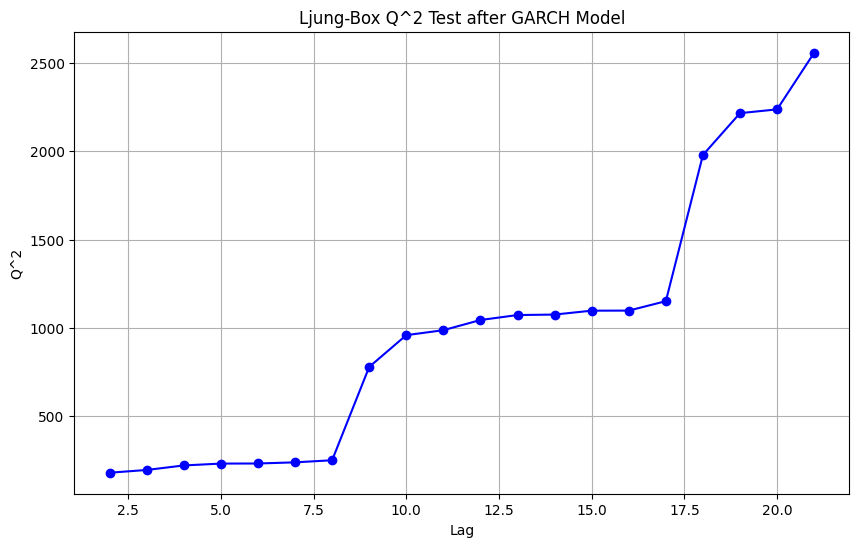

In [ ]:
squared_residuals = garch_results.resid**2
lb_test_results = acorr_ljungbox(squared_residuals, lags=20, return_df=True)
print(lb_test_results)
plt.figure(figsize=(10, 6))
plt.plot(lb_test_results.index + 1, lb_test_results['lb_stat']**2, marker='o', linestyle='-', color='b')
plt.xlabel('Lag')
plt.ylabel('Q^2')
plt.title('Ljung-Box Q^2 Test after GARCH Model')
plt.grid(True)
plt.show()

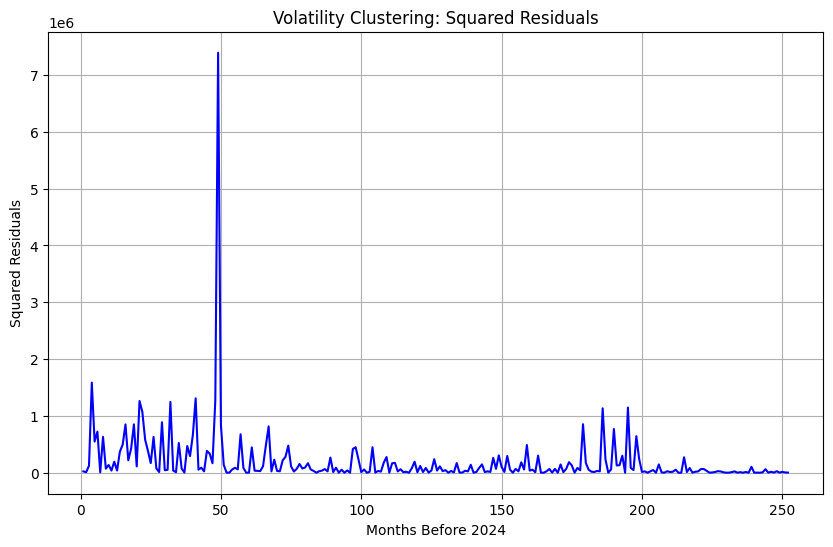

In [ ]:
cosquared_residuals = garch_results.resid ** 2

# Plot squared residuals (volatility clustering)
plt.figure(figsize=(10, 6))
plt.plot(squared_residuals, color='b')
plt.xlabel('Months Before 2024')
plt.ylabel('Squared Residuals')
plt.title('Volatility Clustering: Squared Residuals')
plt.grid(True)
plt.show()